## Loan Application Status Prediction Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
- Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
- Married - This refers to applicant being in a state of matrimony
- Dependents - This refres to persons who depends on the applicants for survival
- Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
- Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
- Applicant Income - This refers to disposable income available for the applicant's use under State law.
- CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
- Loan_Amount - This refers to the amount of money an applicant owe at any given time.
- Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
- Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
- Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

#### Dependent Varaible:

- Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.Loan_Status

- You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
- Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [2]:
## Importing Necessary Libaries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

- Importing Dataset

In [3]:
df = pd.read_csv('loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

- The Given Dataset has 614 rows and 13 columns

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The Dataset has 8 Categorical features and 5 Numerical Features , The Categorical features need to be converted to Numerical feature for Model building
- The Target Variable is the feature 'Loan_Status'
- The Output feature has two types of Outputs so this is a Classification Problem.
- From the above analysis we can see that many feature have missing value which need to be treated.
- The Feature 'Loan_ID' is unique to every Data point so this feature is not needed in Prediction.

In [6]:
df = df.drop('Loan_ID',axis = 1)

In [7]:
df.shape

(614, 12)

In [8]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Exploratory Data Analysis

- Seperating the Categorical and Numerical features for further Analysis

In [9]:
Numericals_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [10]:
Numericals_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
Categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


- There seems to be a Difference in the mean and median of the Dataset
- The difference between 75 percentile and maximum value is also large in some features indicating there are some Outliers in the Features.

- Checking for Missing Values

In [13]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
## To check for any Duplicate values
df.duplicated().any()

False

In [15]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

- There seems to be Missing Values in the following columns

In [16]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

- Checking the uniques values in the features

In [17]:
df.nunique().to_frame("Unique Values")

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


Lets see the Value counts for the features with less or equal to 10 unique values

In [18]:
Unique_features = []
for col in df.columns:
    if len(df[col].value_counts()) < 20:
        Unique_features.append(col)
        print(col)
        print(df[col].value_counts())
        print("*" * 50)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
**************************************************
Married
Yes    398
No     213
Name: Married, dtype: int64
**************************************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************************************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
**************************************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
**************************************************
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
**************************************************
Property_Area
Semiurban    233
Urba

- I have set the maximum number of unique values to 10 and we can see the above columns have uniques values

#### Treating the Missing Values in the Dataset with mean and mode

In [19]:
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [20]:
## Treating missing values of Numerical features with
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# filling categorical data columns with the mode value of that column
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- All the missing values in the Dataset has been dealt with

#### Data Visualisation

- Lets check the Bar chart for features with unique features less than 10

In [22]:
Unique_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

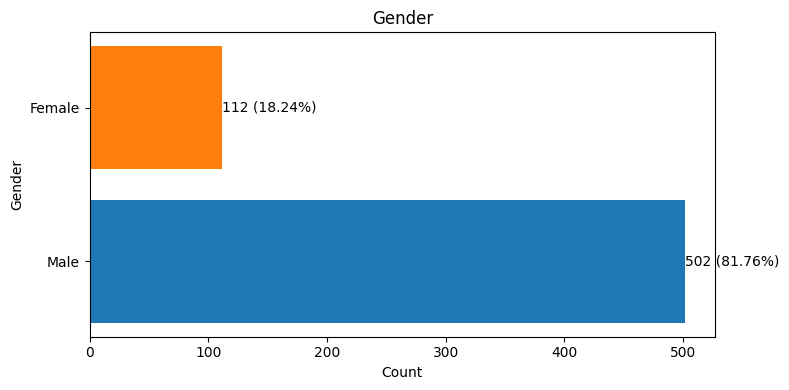

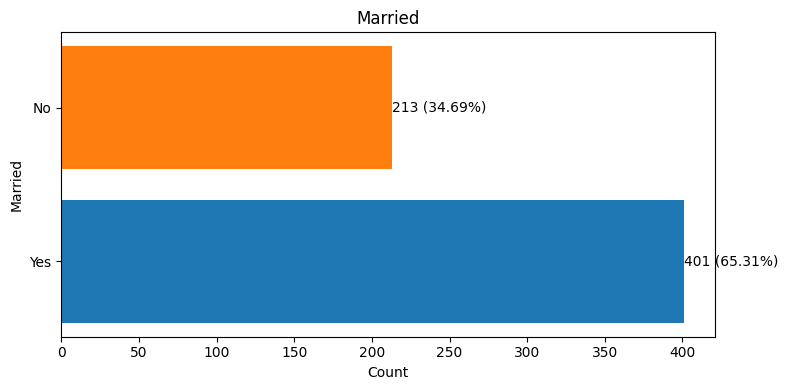

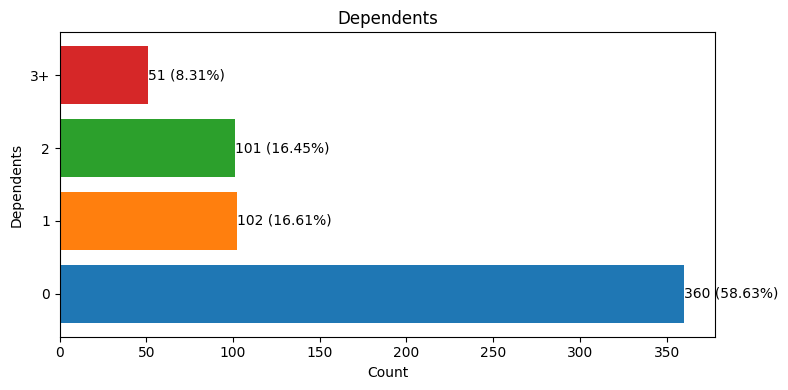

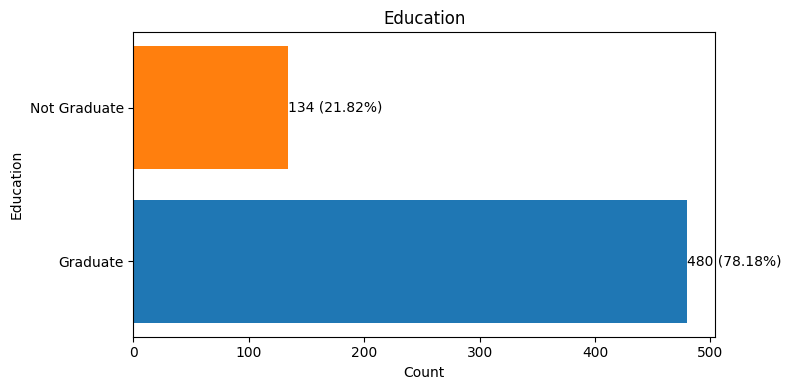

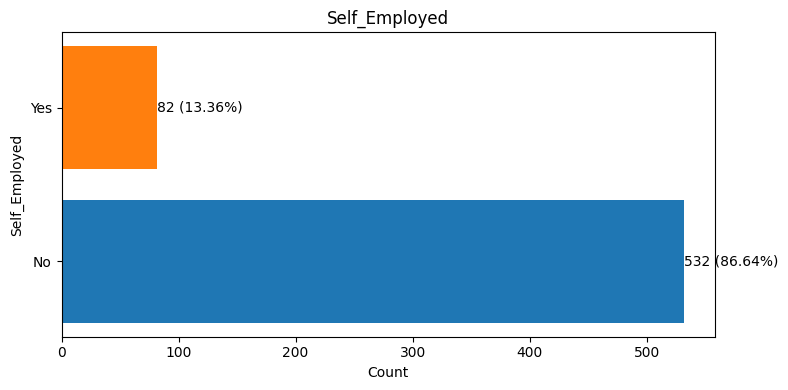

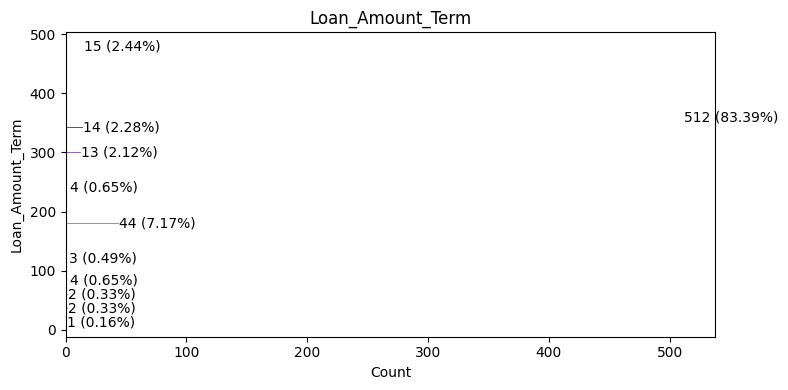

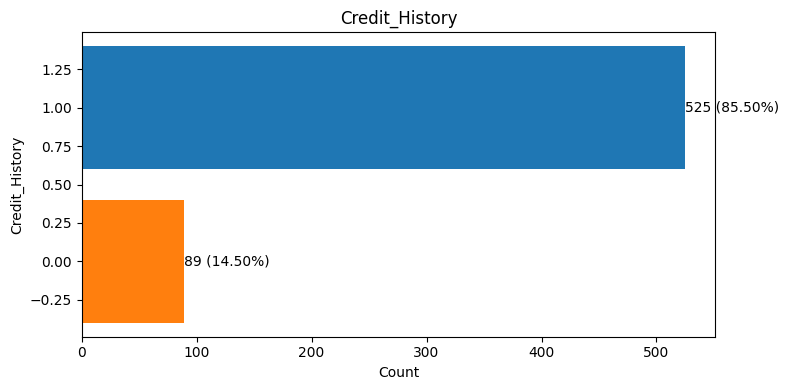

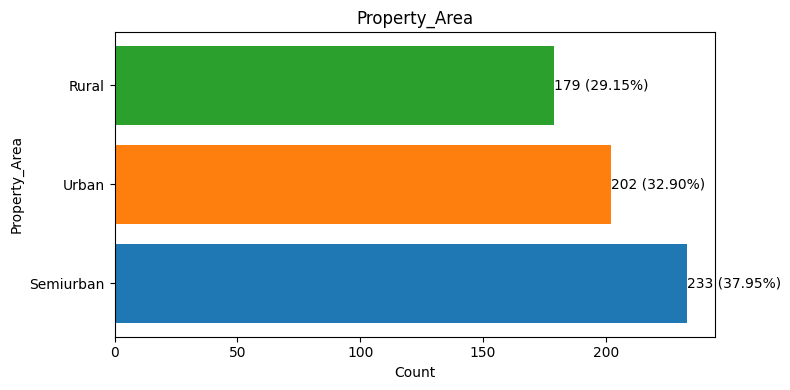

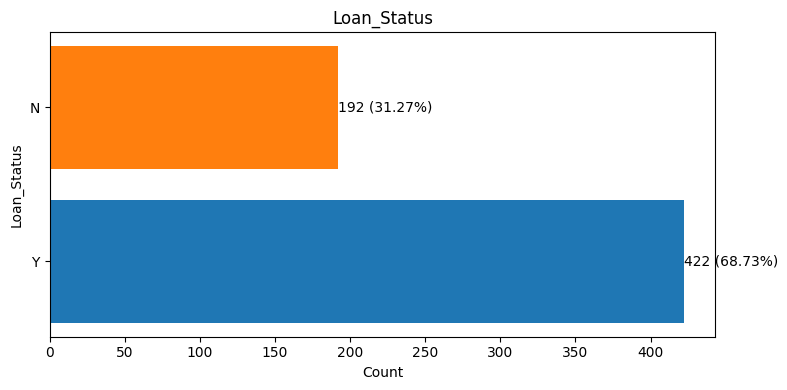

In [23]:
for feature in Unique_features:
    # get value counts and unique values for feature
    value_counts = df[feature].value_counts()
    unique_values = value_counts.index
    
    # create color dictionary for unique values
    color_dict = {}
    for i, value in enumerate(unique_values):
        color_dict[value] = f'C{i}'
    
    # create bar plot with different colors for unique values
    plt.figure(figsize=(8,4))
    bars = plt.barh(value_counts.index, value_counts, color=[color_dict[value] for value in value_counts.index])
    
    # add count/percentage values as annotations
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} ({bar.get_width() / len(df) * 100:.2f}%)', ha='left', va='center')
    
    plt.title(feature)
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

##### Observation
- 68.73% of loan approved status while 31.27% of loan rejected status.This means the Dataset is imbalanced Dataset.
- Males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.
- 65.31% are Married customer and 34.69% of rows are filled with unmarried people.
- 78.18% of rows present in Education column are filled with Graduates while the remaining 21.82% rows are filled with Undergraduates.
- Only 13.36% people are self employed.
- 85.50% of people we have the credit history information available while 14.50% people do not have any credit history.
- 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type in our property area column.

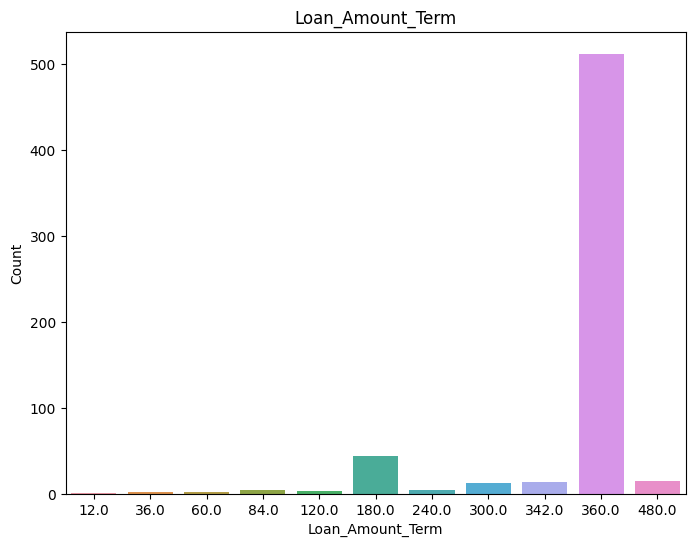

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Amount_Term', data=df)
plt.title('Loan_Amount_Term')
plt.ylabel('Count')
plt.show()

- Highest Number of Datapoints are for 360.0

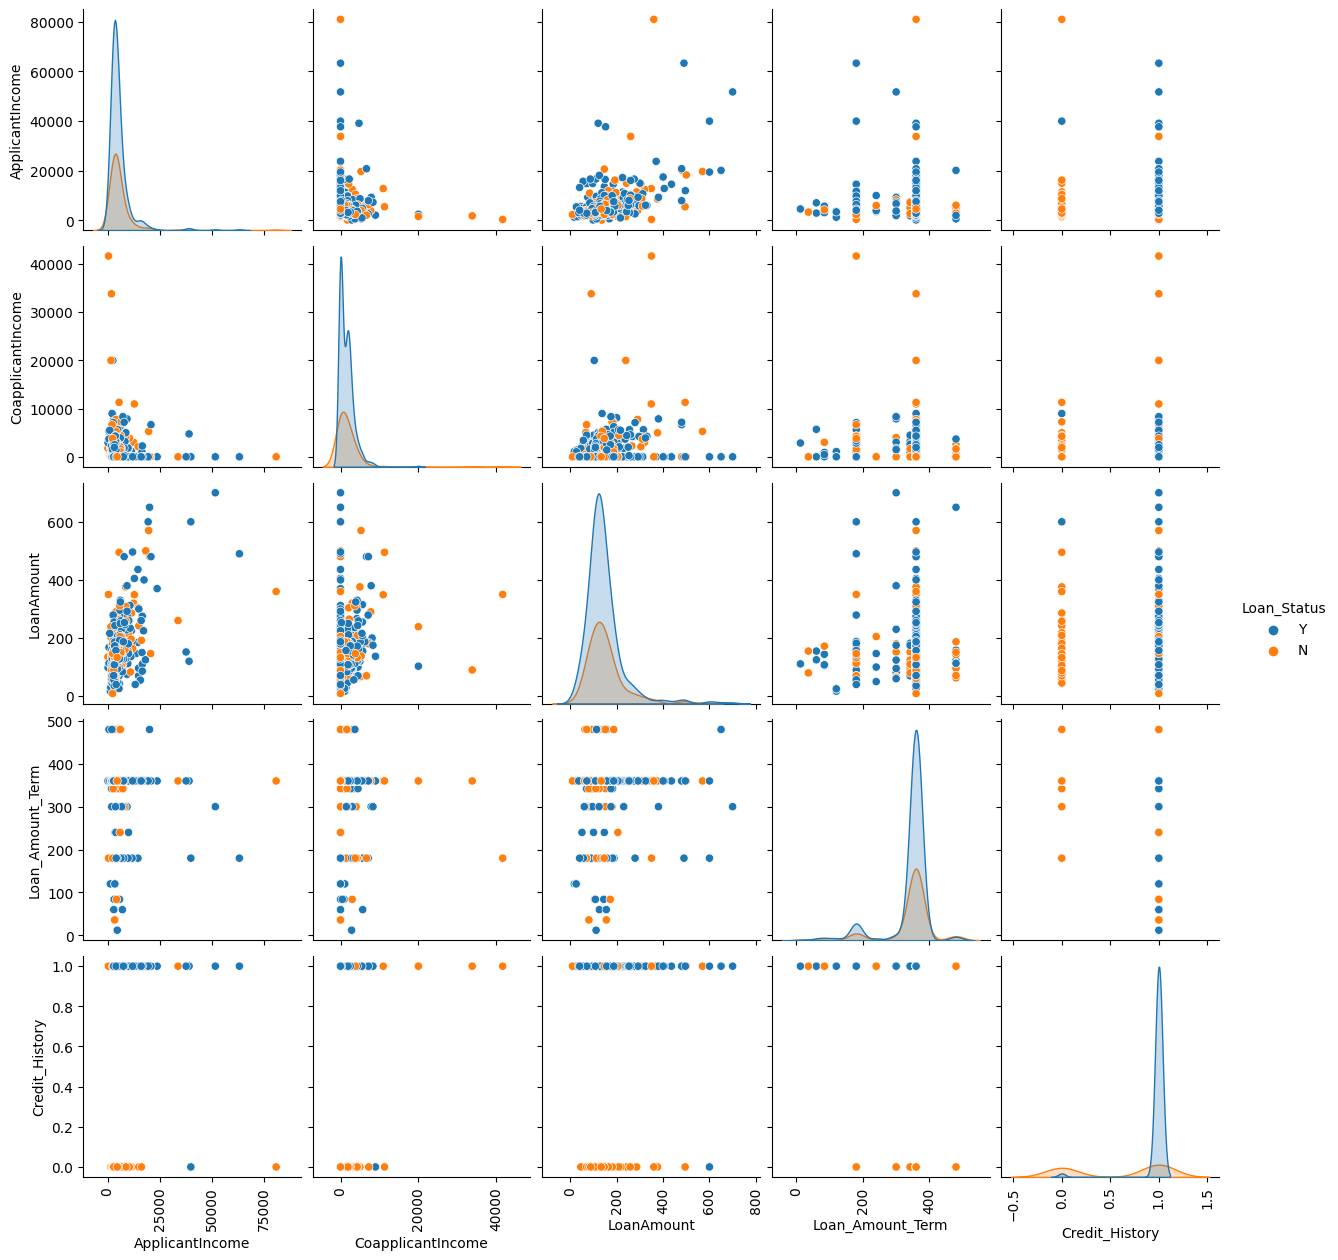

In [25]:
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

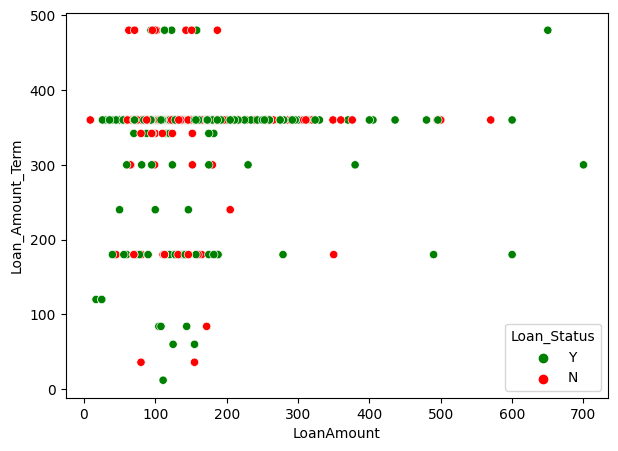

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', palette=['green','red'])
plt.show()

<AxesSubplot: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

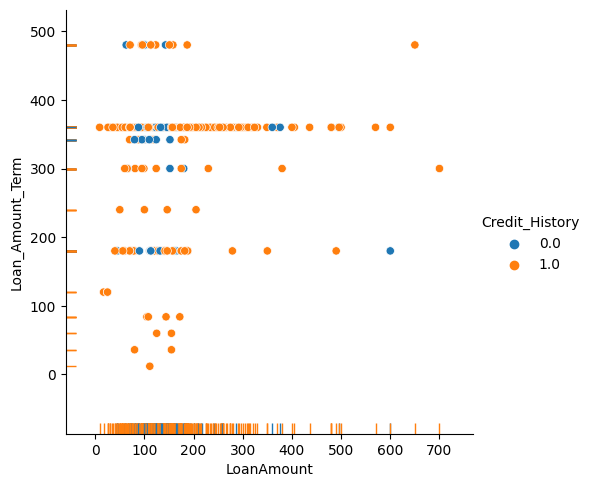

In [27]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

- Most of Customers already have a Credit History

<AxesSubplot: xlabel='LoanAmount', ylabel='ApplicantIncome'>

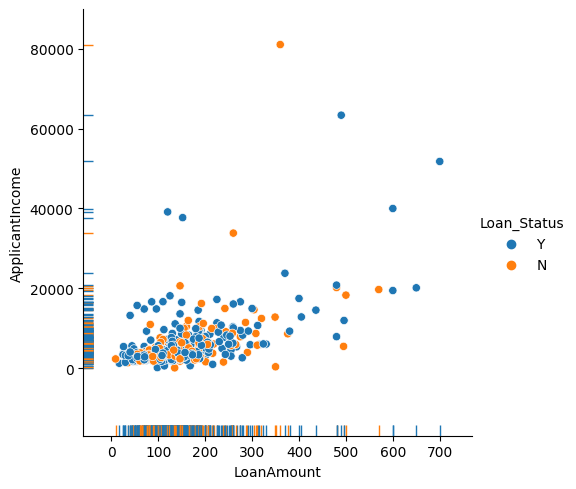

In [28]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

- Most of the data points are converged near the range 0-20000 data for Applicant Income for mostly loan amount between 0-400

<AxesSubplot: xlabel='LoanAmount', ylabel='ApplicantIncome'>

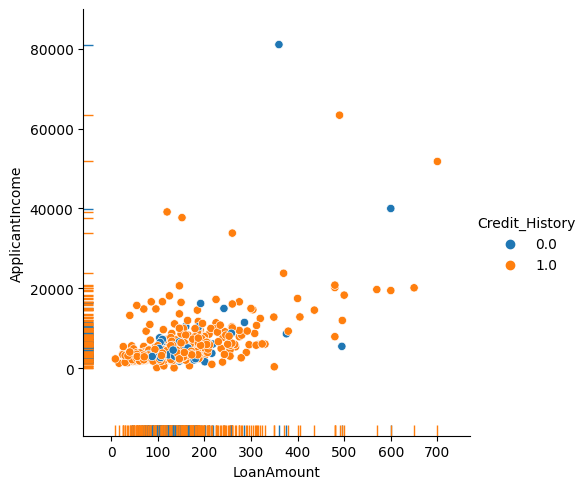

In [29]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

<AxesSubplot: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

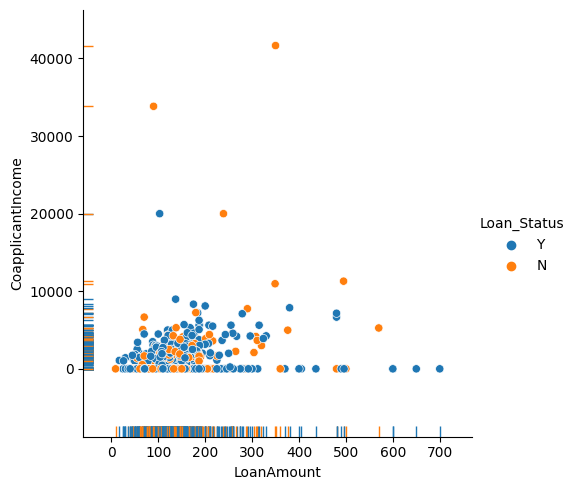

In [30]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

- Coapplicants with higher income are mostly denied loan where most data values are converged between 0-10000 for co applicant income and 0-300 for loan amount data

#### Encoding Categorical Features

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
Encoder = LabelEncoder()
df["Loan_Status"] = Encoder.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


- From the Analysis Done before we can see that there are many unique values among the features ,so we cannot use One-Hot encoding and instead we will use Ordinal Encoder

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
Ordinal_encode = OrdinalEncoder()
df['Gender'] = Ordinal_encode.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = Ordinal_encode.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = Ordinal_encode.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = Ordinal_encode.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = Ordinal_encode.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = Ordinal_encode.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


- With Ordinal Encoding we avoided Problem of Curse of Dimensionality

In [35]:
df.shape

(614, 12)

#### Outlier Detection

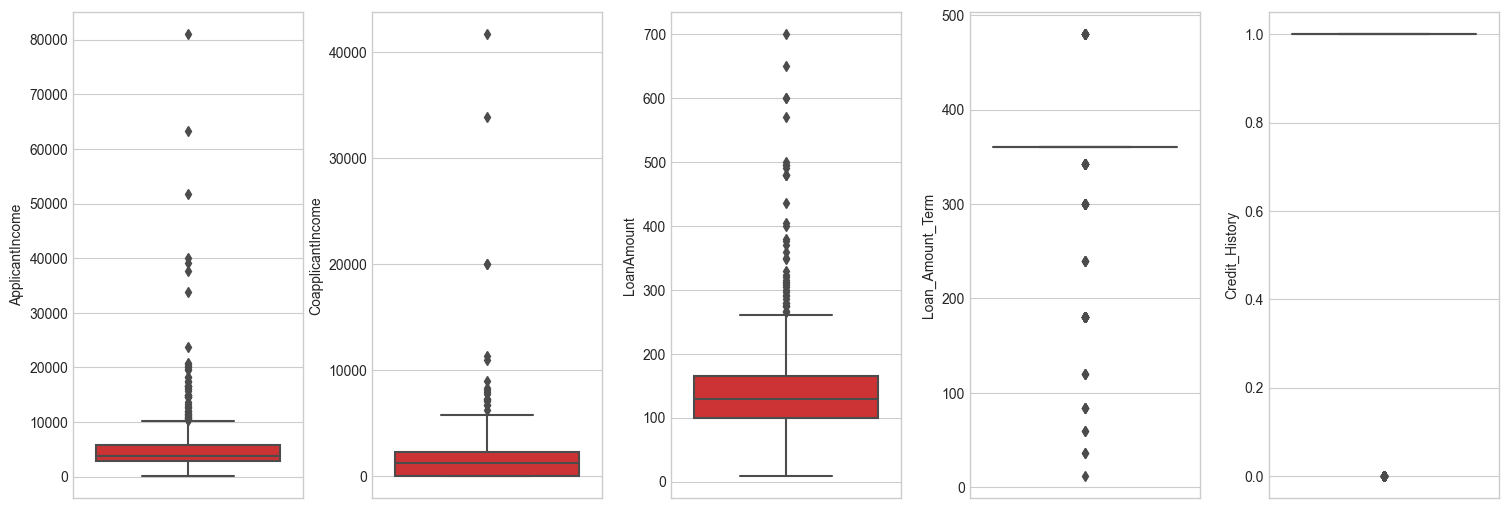

In [36]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- All the Numerical Features have presence of Outliers in them which needs to be treated

#### Checking Skewness by Analyzing the Distribution

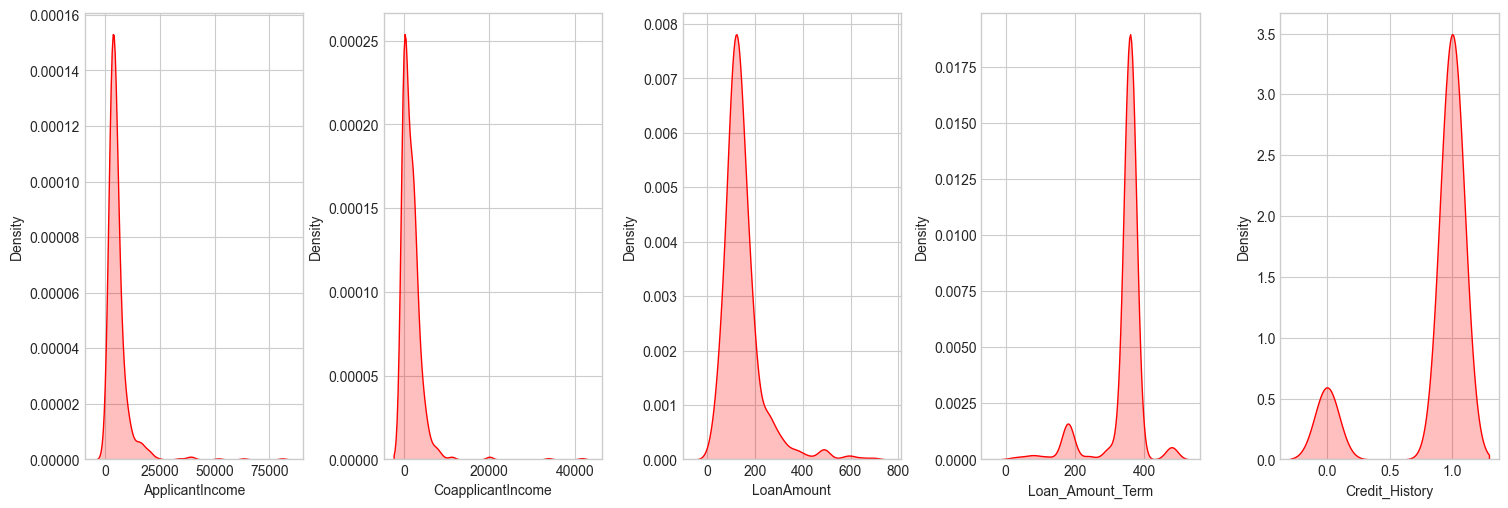

In [37]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- There seems to be Skewness in Numerical features which needs to be treated

- Lets check by using histogram

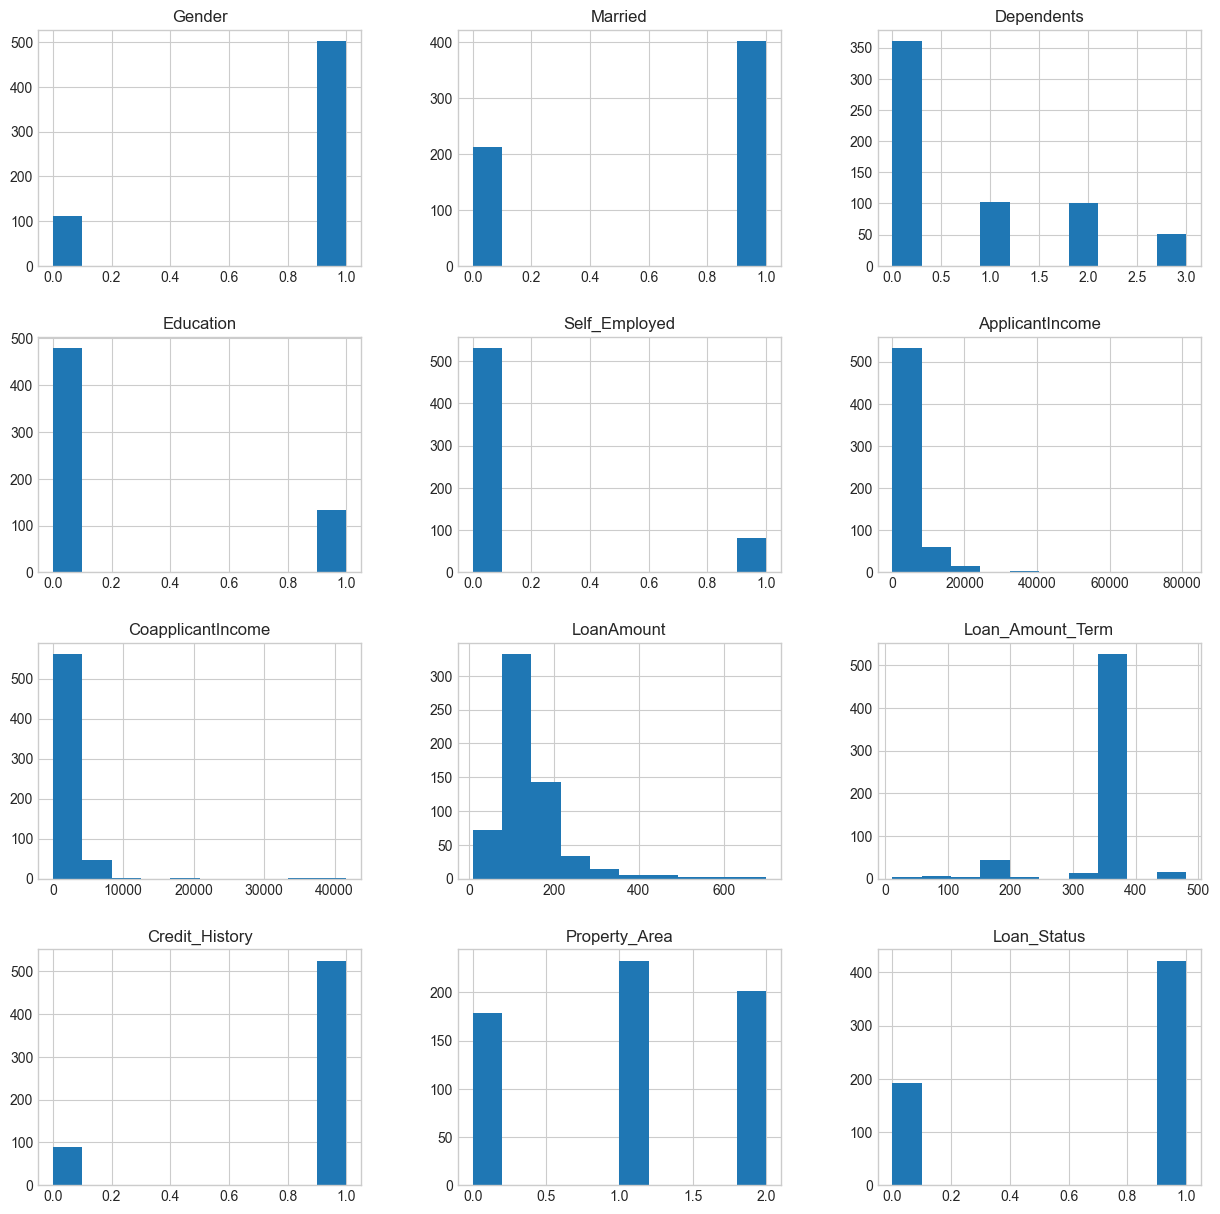

In [38]:
df.hist(figsize=(15,15))
plt.show()

### Correlation

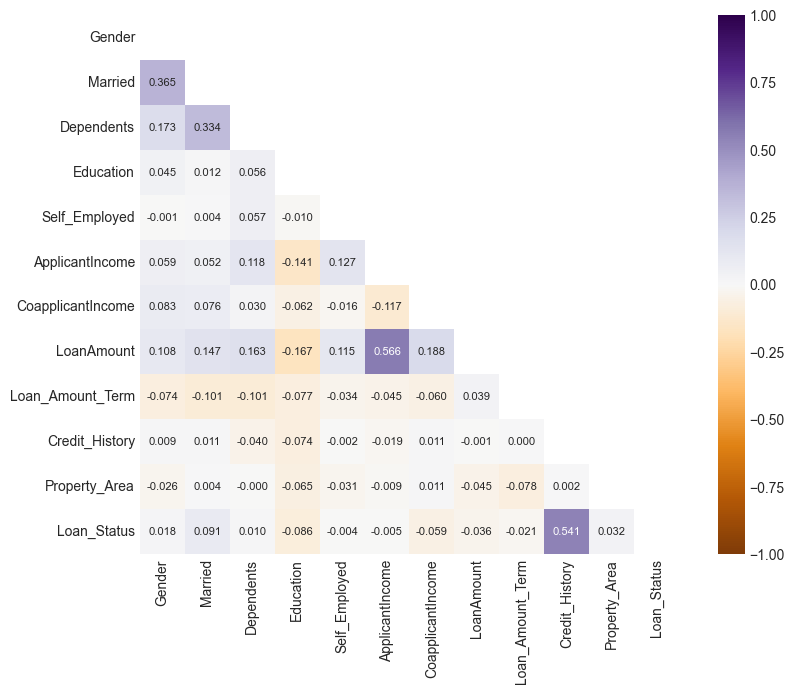

In [39]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="PuOr", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

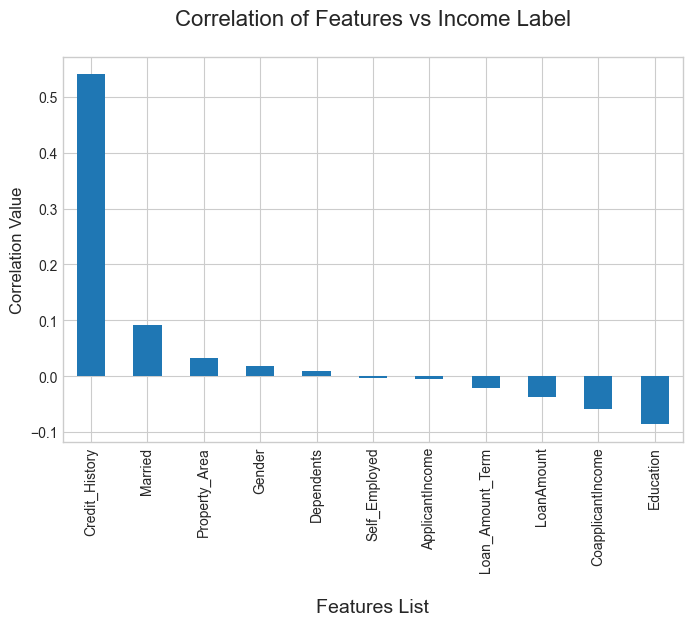

In [40]:
df_corr = df.corr()
plt.figure(figsize=(8,5))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- The Features loan amount term, loan amount, co applicant income and education are negatively correlated while all the remaining features are positively correlated with our Target feature.

#### Handling Outliers

In [41]:
from scipy.stats import zscore
## Lets assume the Threshold to be where data points which have higher Z-score than 3 will be treated as Outliers
threshold = 3
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

## Calculating the Paramters to get the idea about the Data Loss
print ("Dataframe shape before removing outliers: ", df.shape)
print ("Dataframe shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe shape before removing outliers:  (614, 12)
Dataframe shape after removing outliers:  (577, 12)
Percentage of data loss after outlier removal:  6.026058631921824


- After removing the Outliers we can see that the Data Loss is 6% approx which is acceptable

In [42]:
df=df_new.copy()

#### Treating skewness of Numerical Features

In [43]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [44]:
for col in Numericals_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [45]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

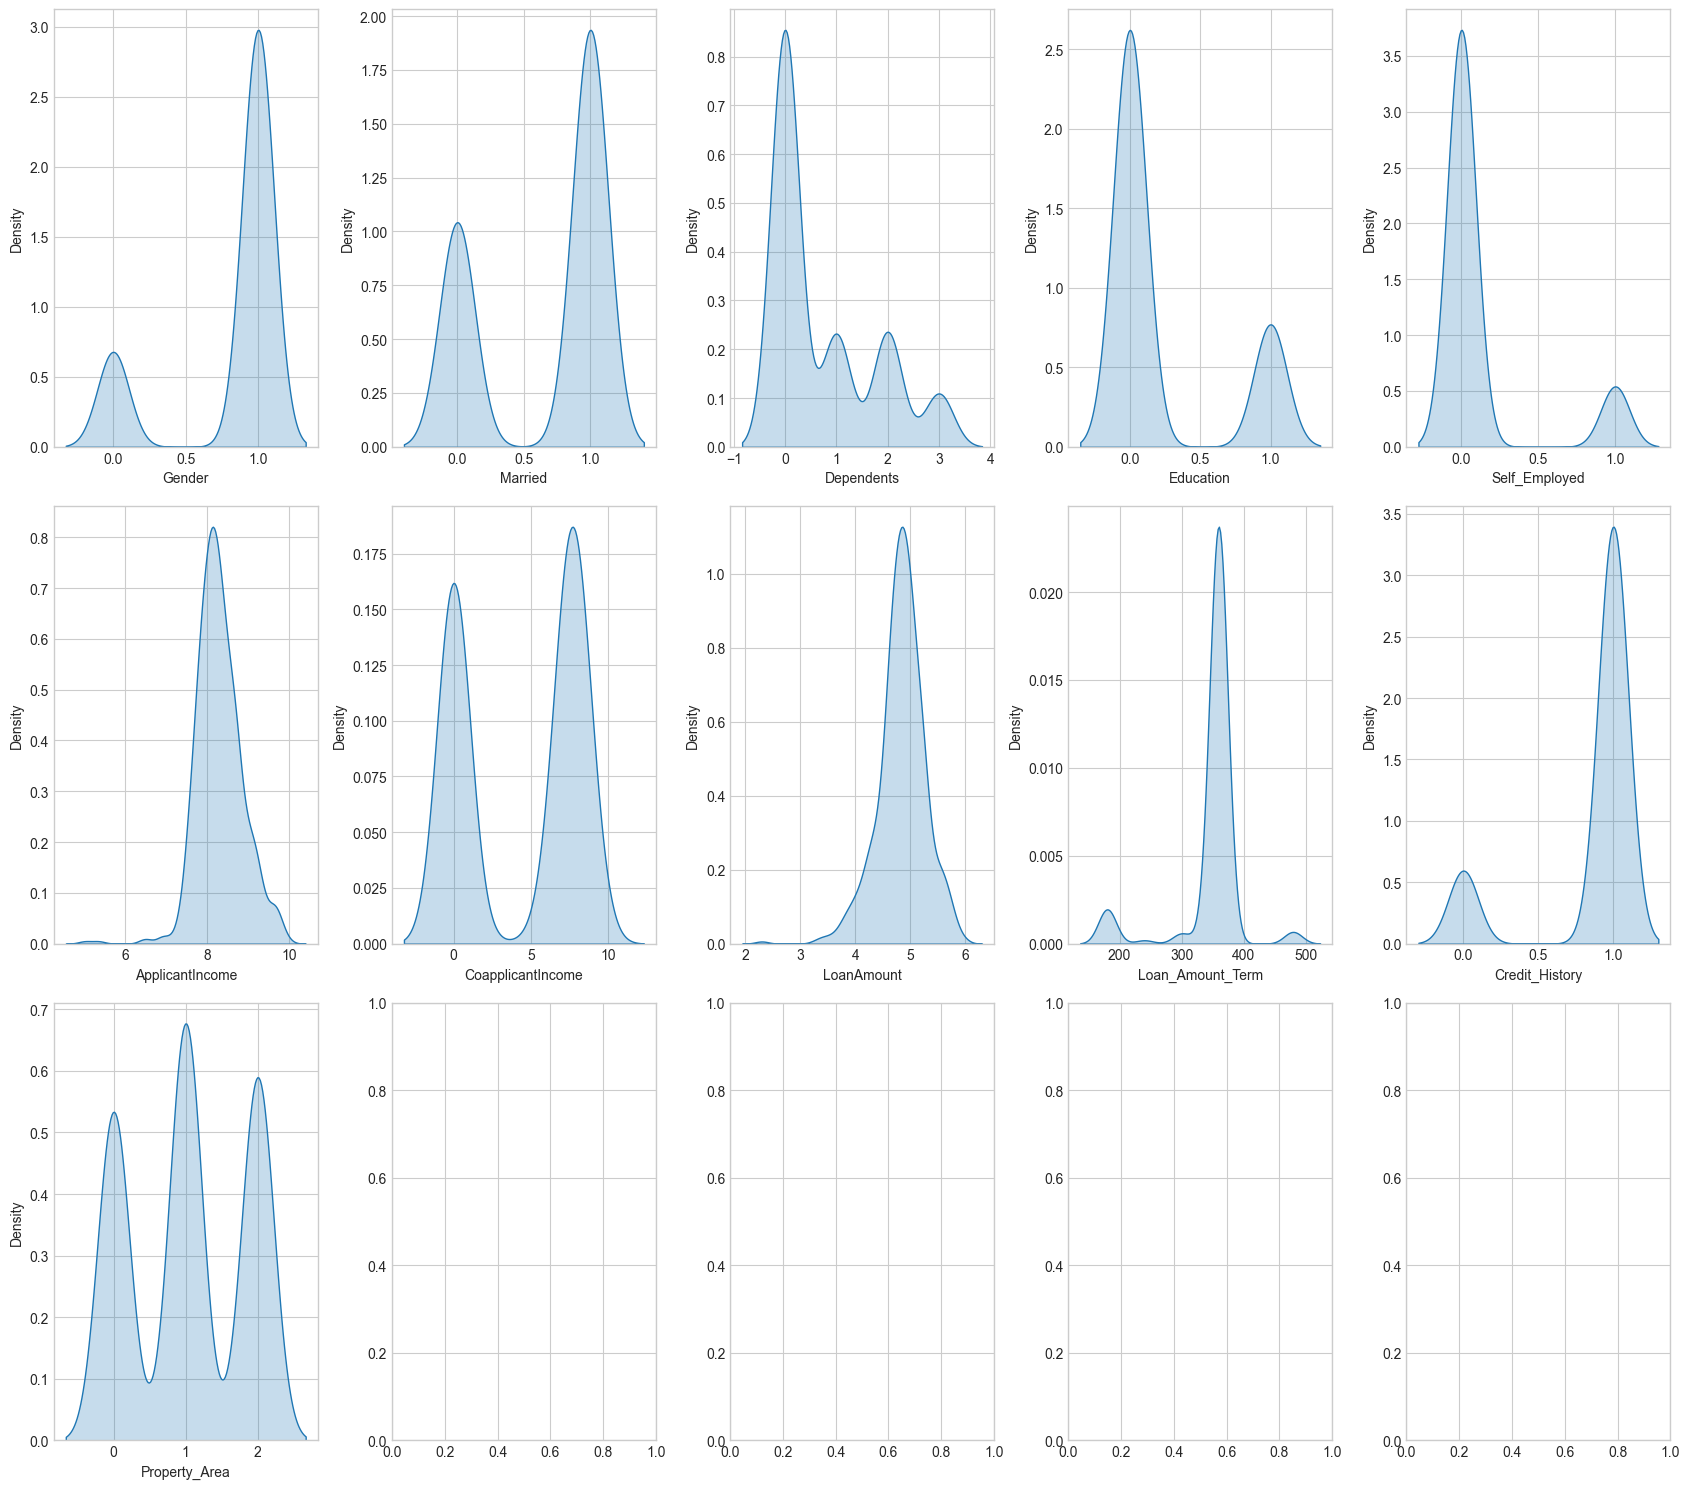

In [46]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Loan_Status", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout()
plt.show()

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [47]:
X = df.drop('Loan_Status', axis=1)
y = df.Loan_Status

In [48]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.993232,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,360.0,1.0,2.0


In [49]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [50]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

 - We can see that the Dataset is Imbalaanced

- We will Use Oversampling Method to Balance the Dataset using SMOTE Technique

In [51]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [52]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

- The Dataset is now perfectly Balanced

#### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.497156,-1.344484,-0.709621,-0.586376,-0.399178,0.702300,-1.090495,0.367785,0.231367,0.588479,1.224952
1,0.497156,0.779151,0.317682,-0.586376,-0.399178,0.245184,0.820400,0.039219,0.231367,0.588479,-1.304631
2,0.497156,0.779151,-0.709621,-0.586376,2.711568,-0.548873,-1.090495,-1.574110,0.231367,0.588479,1.224952
3,0.497156,0.779151,-0.709621,1.825552,-0.399178,-0.829300,0.937047,-0.118445,0.231367,0.588479,1.224952
4,0.497156,-1.344484,-0.709621,-0.586376,-0.399178,0.750068,-1.090495,0.275669,0.231367,0.588479,1.224952


In [54]:
## Importing ML Algortihms and Performance Metrics , GridSearch and Cross Validation for Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Train Test Split and Finding the best random state for the models

In [55]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 83.41708542713567 for Random State 86


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=86)

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Loan Status'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [68]:
def Loan_prediction(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=86)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [69]:
model = LogisticRegression()
Loan_prediction(model, X, y)

Accuracy Score: 83.41708542713567

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        84
           1       0.79      0.97      0.87       115

    accuracy                           0.83       199
   macro avg       0.87      0.81      0.82       199
weighted avg       0.86      0.83      0.83       199

Cross Validation Score: 74.62893081761007

Accuracy Score - Cross Validation Score is 1.7529787301286177


#### Support Vector Classifier

In [70]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=129)
Loan_prediction(model, X, y)

Accuracy Score: 83.41708542713567

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        84
           1       0.82      0.92      0.87       115

    accuracy                           0.83       199
   macro avg       0.84      0.82      0.82       199
weighted avg       0.84      0.83      0.83       199

Cross Validation Score: 77.01650943396228

Accuracy Score - Cross Validation Score is -0.6345998862235973


#### Decision Tree Classifier

In [71]:
model = DecisionTreeClassifier()
Loan_prediction(model, X, y)

Accuracy Score: 75.87939698492463

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        84
           1       0.84      0.72      0.78       115

    accuracy                           0.76       199
   macro avg       0.76      0.77      0.76       199
weighted avg       0.77      0.76      0.76       199

Cross Validation Score: 78.64779874213836

Accuracy Score - Cross Validation Score is -2.2658891943996764


#### Random Forest Classifier

In [72]:
model = RandomForestClassifier(random_state=129)
Loan_prediction(model, X, y)

Accuracy Score: 86.4321608040201

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        84
           1       0.87      0.90      0.89       115

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199

Cross Validation Score: 83.80817610062893

Accuracy Score - Cross Validation Score is -7.42626655289024


#### K Neighbors Classifier

In [73]:
model=KNeighborsClassifier(n_neighbors=5)
Loan_prediction(model, X, y)

Accuracy Score: 75.37688442211056

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        84
           1       0.82      0.73      0.77       115

    accuracy                           0.75       199
   macro avg       0.75      0.76      0.75       199
weighted avg       0.76      0.75      0.76       199

Cross Validation Score: 75.50943396226415

Accuracy Score - Cross Validation Score is 0.8724755854745325


#### Extra Trees Classifier

In [74]:
model=ExtraTreesClassifier()
Loan_prediction(model, X, y)

Accuracy Score: 85.42713567839196

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        84
           1       0.89      0.85      0.87       115

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.86      0.85      0.85       199

Cross Validation Score: 84.437893081761

Accuracy Score - Cross Validation Score is -8.055983534022317


#### XGB Classifier

In [75]:
model=xgb.XGBClassifier(verbosity=0)
Loan_prediction(model, X, y)

Accuracy Score: 87.43718592964824

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        84
           1       0.90      0.88      0.89       115

    accuracy                           0.87       199
   macro avg       0.87      0.87      0.87       199
weighted avg       0.88      0.87      0.87       199

Cross Validation Score: 81.92216981132077

Accuracy Score - Cross Validation Score is -5.540260263582084


#### - Form the Above We can conclude that Extra Tree Classifier is the Best model

### Hyperparameter tuning the Best Model

In [76]:
parameters = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'max_depth' : [0, 15, 30 , 40, 50 ,60],
              'n_estimators' : [50, 100, 150, 200, 250, 300]
             }

In [77]:
Grid_Search = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30, 40, 50, 60],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'n_jobs': [-2, -1, 1]})

In [78]:
Grid_Search.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50, 'n_jobs': -1}

In [79]:
Grid_Search.best_score_

0.8317667322834644

#### Final Model

In [80]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=50, n_jobs=-1, random_state=1000)
Classifier = Final_Model.fit(X_train, y_train)
final_pred = Final_Model.predict(X_test)
final_accuracy = (accuracy_score(y_test, final_pred))*100
print("Accuracy score for the Best Model is:", final_accuracy)

Accuracy score for the Best Model is: 86.25


### AUC ROC Curve

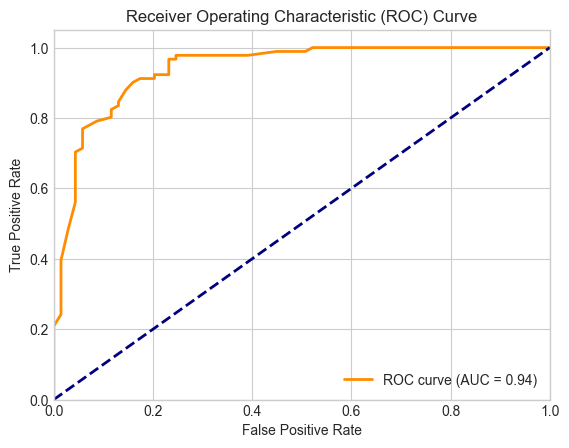

In [81]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_score = Final_Model.predict_proba(X_test)[:, 1]

# calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#### - The AUC score of 0.94 is very high

### Confusion Matrix

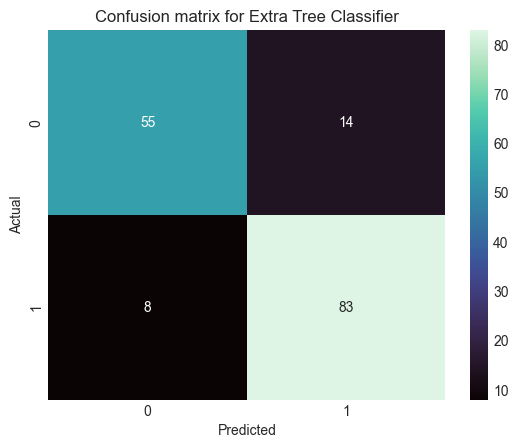

In [82]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the model

In [83]:
import joblib
filename = "Loan_status.pkl"
joblib.dump(Final_Model, filename)

['Loan_status.pkl']